# CMSC 197 PROBLEM SET
# IMPLEMENTING LINEAR REGRESSION WITH GRADIENT DESCENT AS OPTIMIZATION FUNCTION
CREATED BY: JOHN MARKTON OLARTE

In [1]:
# Import the necessary python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# NOTE: sklearn should only be used for the following:
#     Standardization and Dividing the Data into Training and Testing Sets
#     Checking MSE and r^2 values
#     Lastly for comparison of implementation (from scratch) and the OLS results since sklearn uses least squares for linear regression.
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

## DETAILS OF THIS PROBLEM SET
Main Goal: Predict Sales from TV, Radio, and Newspaper Advertising Expenditures.
Dataset: Advertising.csv
Features (X): TV, Radio, and Newspaper
Response (Y): Sales

## TO DO
Implement Linear Regression with Gradient Descent as Optimization Function:
h0(x) = theta0 + theta1*x1 + theta2*x2 + ... + thetan*xn = theta^T * X

## APPLICATION

### STEP 1
Load the dataset using pandas

In [2]:
# Load the data from Advertising.csv into a pandas dataframe
df = pd.read_csv('Advertising.csv')

# Since the first column is just the index, we can drop it
df = df.drop('Unnamed: 0', axis=1)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Visualizations of the dataset

c:\Users\johnm\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\core.py:1070: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='Newspaper', ylabel='Sales'>

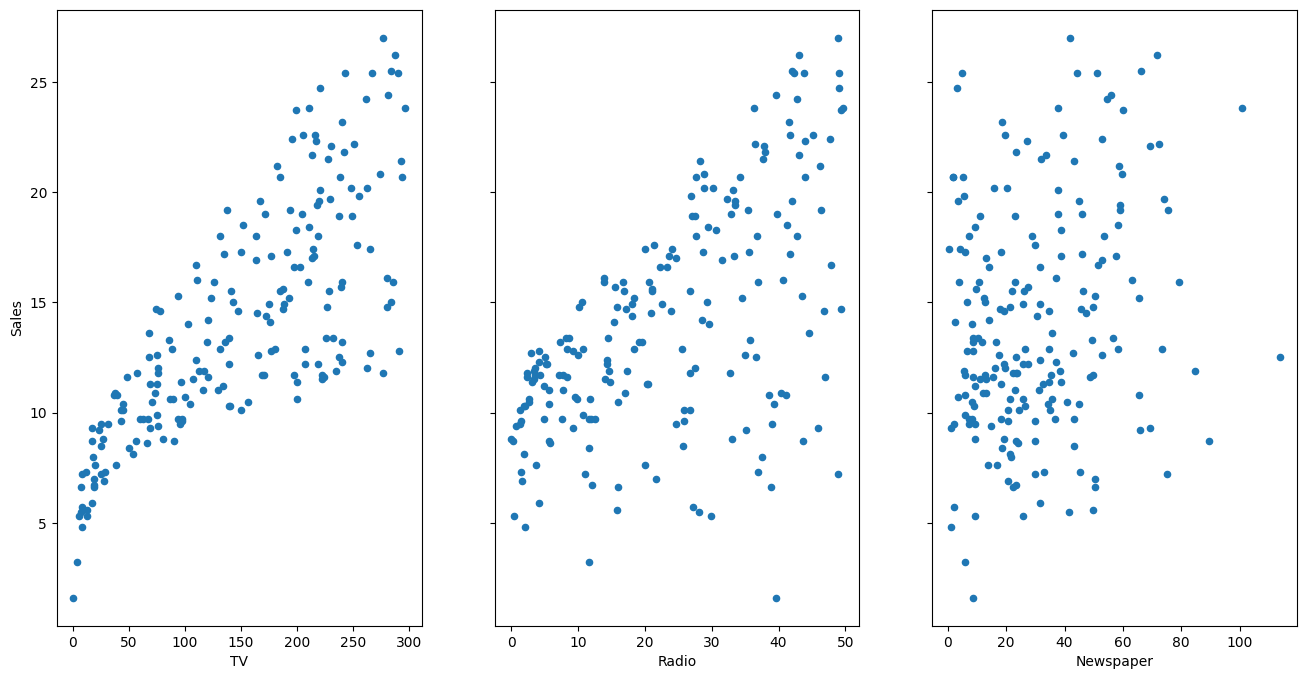

In [3]:
# Visualize the data side by side
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [4]:
# Quantitative Analysis
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### STEP 2
Standardize each column of the dataset

In this part I will show how can we do it manually and using sklearn

In [5]:
# MANUAL STANDARDIZATION

# First we create a new dataframe that will hold the standardized values
df_standardized_manual = df.copy()

# Then we will change the values of the new dataframe to the standardized values, based on the given formula

# TV
TV_mean = df_standardized_manual['TV'].mean()
TV_std = df_standardized_manual['TV'].std()
df_standardized_manual['TV'] = (df_standardized_manual['TV'] - TV_mean) / TV_std

# Radio
radio_mean = df_standardized_manual['Radio'].mean()
radio_std = df_standardized_manual['Radio'].std()
df_standardized_manual['Radio'] = (df_standardized_manual['Radio'] - radio_mean) / radio_std

# Newspaper
newspaper_mean = df_standardized_manual['Newspaper'].mean()
newspaper_std = df_standardized_manual['Newspaper'].std()
df_standardized_manual['Newspaper'] = (df_standardized_manual['Newspaper'] - newspaper_mean) / newspaper_std

# Sales
sales_mean = df_standardized_manual['Sales'].mean()
sales_std = df_standardized_manual['Sales'].std()
df_standardized_manual['Sales'] = (df_standardized_manual['Sales'] - sales_mean) / sales_std

df_standardized_manual

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
195,-1.267759,-1.317724,-0.769287,-1.230964
196,-0.615491,-1.236899,-1.031011,-0.828469
197,0.348934,-0.940539,-1.109069,-0.234310
198,1.590574,1.261955,1.636743,2.199827


In [6]:
# USING SKLEARN
# In this process, we will be using the preprocessing.scale function from sklearn
df_standardized_sklearn = preprocessing.scale(df)

# Convert the standardized data into a dataframe
df_standardized_sklearn = pd.DataFrame(df_standardized_sklearn, columns=df.columns)
df_standardized_sklearn

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


In [7]:
# FOR CHECKING
# Just to check if the manual standardization and the sklearn standardization are the same
#  We can do this by subtracting the two dataframes
df_standardized_manual - df_standardized_sklearn

,TV,Radio,Newspaper,Sales
0,-0.002428,-0.002457,-0.004453,-0.003885
1,0.002997,-0.002710,-0.001676,0.001742
2,0.003795,-0.003826,-0.004464,0.002271
3,-0.000130,-0.003048,-0.003220,-0.002154
4,-0.000987,0.002107,-0.003209,0.000540
...,...,...,...,...
195,0.003181,0.003307,0.001930,0.003089
196,0.001545,0.003104,0.002587,0.002079
197,-0.000876,0.002360,0.002783,0.000588
198,-0.003991,-0.003167,-0.004107,-0.005520


From the above results we can see that our manual standardization is almost the same as the one from sklearn, the slight difference might be due to the small difference in the mean and standard deviation of the dataset using the two methods.

In [8]:
# Moving forward, we will be using the standardized data from sklearn
df_standardized = df_standardized_sklearn
df_standardized

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


### STEP 3
Add a new column to the dataset with a value of 1 for each row

In [9]:
# We can do this by using the insert function from pandas
df_standardized.insert(0, 'all_ones', 1)
df_standardized

,all_ones,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


### STEP 4
Divide the dataset into training and testing sets

In [10]:
# Feature Selection: TV, Radio, Newspaper, and all_ones
features = df_standardized[['all_ones', 'TV', 'Radio', 'Newspaper']]
# Select the Sales column as the target (response) variable
response = df_standardized['Sales']

#  We will be using 85% of the data for training and 15% for testing
X_train, X_test, y_train, y_test = train_test_split(features, response, train_size=0.85, test_size=0.15)

### STEP 5
Fit the model on the training set.
Note that we are not allowed to use sklearn for this part.

#### CREATE THE REQUIRED FUNCTIONS

##### 1. DEFINE A FUNCTION TO INITIALIZE WEIGHTS
This function will intitialize the weights of the model to 0 (if random=False), or to random values (if random=True)

In [11]:
def initialize_weights(X, random=False):
    len_X = X.shape[1]
    
    if random:
        return np.random.rand(len_X)
    return np.zeros(len_X)

Test the function from the above cell.

In [12]:
# Initialize the weights (Randomly)
weights = initialize_weights(X_train, random=True)
weights

array([0.03925196, 0.77878701, 0.5496157 , 0.931355  ])

In [13]:
# Initialize the weights (Zeros)
weights = initialize_weights(X_train)
weights

array([0., 0., 0., 0.])

##### 2. DEFINE A FUNCTION THAT RETURNS THE PREDICTED Y (Y_HAT)
Returns a vector of the predicted values of y_hat

In [14]:
def predict(X, weights):
    y_hat = np.dot(X, weights)

    return y_hat

Test the function from the above cell.

In [15]:
# Predict the values of the training set, using a random set of weights
y_hat_train = predict(X_train, initialize_weights(X_train, random=True))

# We can compare the predicted values to the actual values by creating a new dataframe.
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
df_train

,Actual,Predicted
14,0.956403,1.682343
11,0.648971,0.698314
147,2.186132,2.349804
170,-1.080337,-0.746112
73,-0.580759,0.107455
...,...,...
5,-1.310911,0.892645
130,-2.386924,-0.778212
56,-1.637558,-0.282966
47,1.763413,1.612861


As we can see the predicted values and actual values sometimes are close and sometimes are far from each other. This means that our model is not yet accurate.
Hence in this activity we will try to improve the accuracy of our model by using gradient descent.

##### 3. DEFINE A FUNCTION TO COMPUTE FOR THE COST
Returns a scalar value that tells use how accurate the model is

cost = J_theta = 1/2m * sum(h0(x) - y)^2
where m is the length of the dataset, h0(x) is the predicted value of y, and y is the actual value of y

In [16]:
def compute_cost(X, y, weights):  
    # Initialize the length of the data
    # The length of the data is equal to the length of either the response or the features
    # For simplicity, we will use the length of the response
    m = len(y)

    # Calculate the cost function
    cost = 1/(2*m) * np.sum((predict(X, weights) - y)**2)
    
    return cost

In [17]:
# Let us try to check the cost function of the training set, using a random set of weights
test_cost = compute_cost(X_train, y_train, initialize_weights(X_train, random=True))
print(f"TEST COST: {test_cost}")

TEST COST: 0.4356594803916451


##### 4. DEFINE A FUNCTION TO COMPUTE THE GRADIENT
This function returns a matrix (w) that represents the partial derivative of the cost function J(theta_0, theta_1) with respect to each parameter theta_j.

w = alpha * 1/m * sum(y_hat - y) * x_j

where w is is an array with sa shape of len(feautures) + 1,
alpha is the learning rate, m is the length of the dataset,
y_hat is the predicted value of y,
y is the actual value of y,
and x_j is the jth feature of the dataset

In [18]:
def compute_gradient(X, y, weights):
    # Initialize the length of the data
    m = len(y)
    
    w = 1/m * np.dot(X.T, (predict(X, weights) - y))

    return w

##### 5. DEFINE A FUNCTION TO UPDATE THE WEIGHTS BASED ON THE GRADIENT FOR THE SPECIFIC ITERATION
This function will update the weights for that certain iteration

In [19]:
def update_weights(X, y, weights, alpha):
    updated_weights = weights - alpha * compute_gradient(X, y, weights)

    return updated_weights

##### 6. DEFINE A FUNCTION THAT WILL RUN THE GRADIENT DESCENT ALGORITHM
This function will return 2 matrices
1. Matrix for the weights per iteration
2. Matrix fo the costs for each iteration

In [20]:
def gradient_descent(X, y, weights, alpha, iterations):
    # Since we are to produce 2 matrices, we first initialize these two matrices
    weights_history = [0] * iterations
    cost_history = [0] * iterations

    # Loop through the number of iterations
    for i in range(iterations):
        # Update the weights
        weights = update_weights(X, y, weights, alpha)
        # Save the weights in the weights history matrix
        weights_history[i] = weights
        # Compute the cost
        cost = compute_cost(X, y, weights)
        # Save the cost in the cost history matrix
        cost_history[i] = cost
    
    return weights_history, cost_history


##### 7. DEFINE A FUNCTION THAT WILL PLOT THE COSTS FOR EACH ITERATIONS

In [21]:
def plot_costs(cost_array):
    # Set the size of the plot
    plt.figure(figsize=(10, 6))
    plt.plot(cost_array)
    plt.title('Cost over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.show()

##### 8. PREDICT Y FOR TRAIN SET AND CALCULATE THE COST

In [22]:
# Predict y_hat using the test set
weights = initialize_weights(X_train, random=True)
y_hat_train = predict(X_train, weights)
y_hat_train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_hat_train})
y_hat_train_df

,Actual,Predicted
14,0.956403,1.792110
11,0.648971,1.384720
147,2.186132,2.544710
170,-1.080337,-0.199868
73,-0.580759,0.348834
...,...,...
5,-1.310911,0.836894
130,-2.386924,0.127374
56,-1.637558,0.050618
47,1.763413,2.159019


As we can see from the dataframe above, the predicted values is not that accurate, hence we can assume that the cost is high.
Let's try to see it by calculating for the cost below!

In [23]:
# Calculate the cost of the predicted values
train_cost = compute_cost(X_train, y_train, weights)
train_cost

0.5358302405509774

##### 9. PREDICT Y FOR TEST SET AND CALCULATE THE COST

In [24]:
# Predict y_hat using the test set
weights = initialize_weights(X_test, random=True)
y_hat_test = predict(X_test, weights)
y_hat_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_hat_test})
y_hat_test_df['Residual'] = y_hat_test_df['Actual'] - y_hat_test_df['Predicted']
y_hat_test_df

,Actual,Predicted,Residual
188,0.360753,1.415045,-1.054292
43,-0.215683,0.759420,-0.975103
97,0.283895,1.062636,-0.778742
135,-0.465472,0.599420,-1.064892
143,-0.696046,-0.321645,-0.374402
134,-0.619188,1.270266,-1.889454
70,0.821901,2.059657,-1.237756
146,-0.158039,0.687663,-0.845702
187,0.629756,1.438396,-0.808640
185,1.648126,2.449109,-0.800983


As we can see from the dataframe above, the predicted values is not that accurate, hence we can assume that the cost is high.
Let's try to see it by calculating for the cost below!

In [25]:
# Calculate the cost of the predicted values
test_cost = compute_cost(X_test, y_test, weights)
test_cost

0.6745129309222941

### STEP 6
Predict the quantitative response y on the training set. Evaluate the model using the MSE cost function defined for the gradient descent.

In [26]:
# Initialize the weights
weights = initialize_weights(X_train, random=True)

# Set the iterations and the learning rate
iterations = 10000
alpha = 0.01

# Run the gradient descent algorithm (Training)
weights_history_train, cost_history_train = gradient_descent(X_train, y_train, weights, alpha, iterations)
# Run the gradient descent algorithm (Test)
weights_history_test, cost_history_test = gradient_descent(X_test, y_test, weights, alpha, iterations)

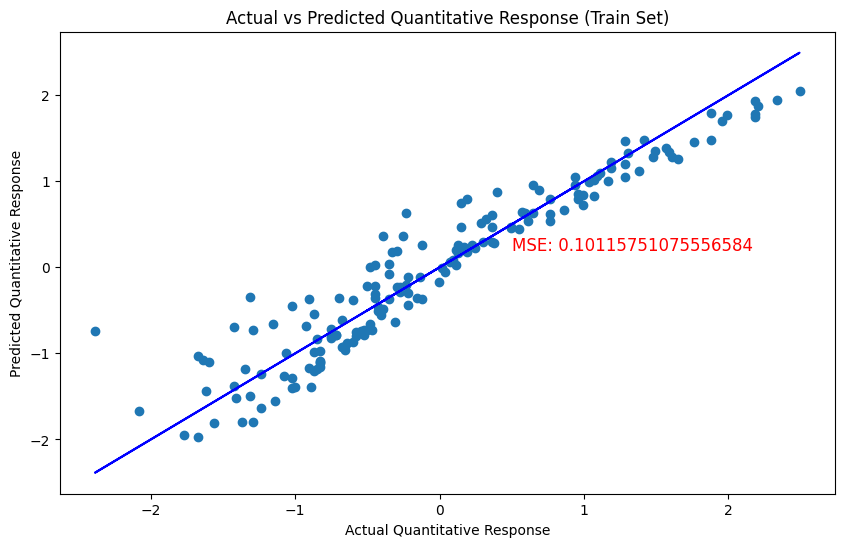

In [27]:
# USING TRAINING SET
# Predict the quantitative response using the train set
y_hat_train = predict(X_train, weights_history_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_hat_train)
plt.title('Actual vs Predicted Quantitative Response (Train Set)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_train, y_hat_train)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_train, y_train, color='blue')
plt.show()

Evalution of the MSE (Training Set): 
The MSE is calculated to be 0.0936. It is said that the closer the value of MSE to zero, means the model is more accurate.

In that case, we can say that our model is accurate enough to a certain degree.
We cannot really say if this is good enough already or maybe there is a model that still exist which have lower MSE value than we currently have. But for our use case this is good enough.

### STEP 7
Predict the quantitative response y on the testing set. Evaluate the model using the MSE cost function defined for the gradient descent.

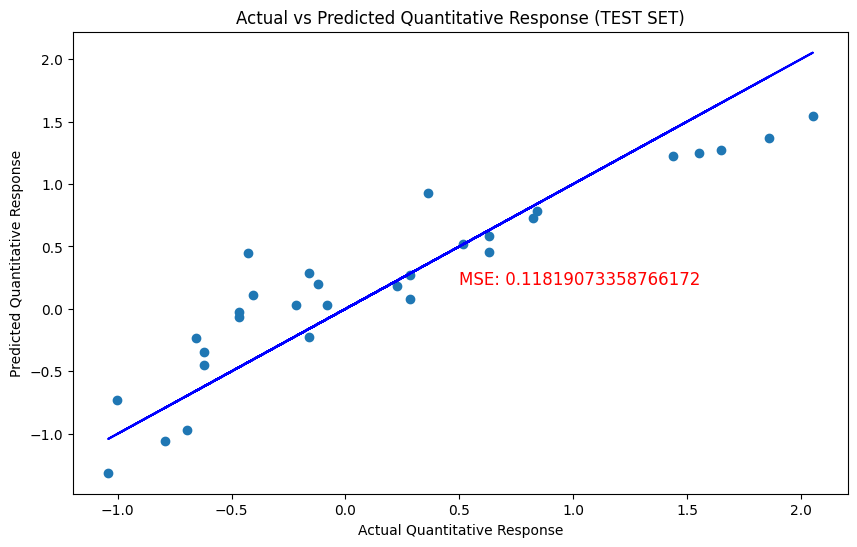

In [28]:
# USING TEST SET
# Predict the quantitative response using the test set
y_hat_test = predict(X_test, weights_history_train[-1])

# Plot the quantitative response of y
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_hat_test)
plt.title('Actual vs Predicted Quantitative Response (TEST SET)')
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
# MSE
plt.text(0.5, 0.20, f"MSE: {mean_squared_error(y_test, y_hat_test)}", color='red', fontsize=12)
# Best Fit Line
plt.plot(y_test, y_test, color='blue')
plt.show()

Evalution of the MSE (Test Set): 
The MSE is calculated to be 0.1594. It is said that the closer the value of MSE to zero, means the model is more accurate.

In that case, we can say that our model is accurate enough to a certain degree.
We cannot really say if this is good enough already or maybe there is a model that still exist which have lower MSE value than we currently have. But for our use case this is good enough.

Also we can take note that our model's MSE on the training dataset is lower than the MSE on the test dataset. Although we cannot say anything yet about this since we are not sure if the difference between the MSE is significant enough (this needs to be tested).

### STEP 8
Let us use the model to predict the sales on the actual dataset.

In [29]:
df_standardized

# Add the Predicted Sales column to the dataframe
df_standardized['Predicted Sales'] = predict(df_standardized[['all_ones', 'TV', 'Radio', 'Newspaper']], weights_history_train[-1])


# Convert the standardized residuals back to the original scale (for all columns)
df_standardized['TV'] = df_standardized['TV'] * df['TV'].std() + df['TV'].mean()
df_standardized['Radio'] = df_standardized['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardized['Newspaper'] = df_standardized['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardized['Sales'] = df_standardized['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardized['Predicted Sales'] = df_standardized['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

# Calculate the Residuals
df_standardized['Residuals'] = df_standardized['Sales'] - df_standardized['Predicted Sales']

# Drop the all_ones column
df_standardized.drop('all_ones', axis=1, inplace=True)

df_standardized

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.546119,1.574151
1,44.242678,39.340241,45.136502,10.390910,12.167104,-1.776194
2,16.874171,45.956803,69.397230,9.288149,12.087131,-2.798982
3,151.511186,41.345260,58.570128,18.511236,17.509396,1.001840
4,180.884712,10.768723,58.469877,12.897183,13.422293,-0.525110
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.498054,2.085829
196,94.067396,4.853917,8.043654,9.689153,8.315686,1.373467
197,177.075176,9.264959,6.339388,12.796932,12.954007,-0.157074
198,283.942679,42.047016,66.289451,25.528802,23.784746,1.744056


### STEP 9
Observe the cost results and analyze.

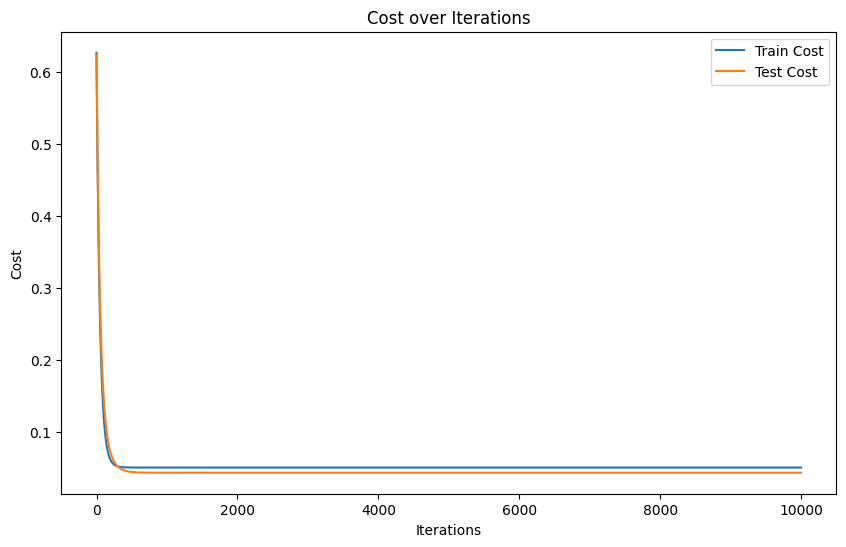

In [30]:
# For us to observe the cost reslts, we can simply plot the cost over iterations
plt.figure(figsize=(10, 6))
plt.plot(cost_history_train, label='Train Cost')
plt.plot(cost_history_test, label='Test Cost')
plt.title('Cost over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

ANALYSIS: As we can observe from the plot, as we get more and more iteration the cost function value decreases. Which suggests that our model is getting more accurate as we get more and more iterations.

## QUESTIONS / EXPLORATION

### QUESTION 1
What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:
h0(x) = theta0 + theta1*TV + theta2*Radio + theta3*Newspaper

What are your interpretations regarding the formed linear model?

In [31]:
# Find the optimal weights using the training set

init_w = initialize_weights(X_train) # We will use the zeros weights as our initial weights

# Set the iterations and the learning rate
iterations = 50000
alpha = 0.01

# Run the gradient descent algorithm
weights_history, cost_history = gradient_descent(X_train, y_train, init_w, alpha, iterations)

# Get the final weights (Optimal weights)
optimal_weights = weights_history[-1]

# Print the optimal weights
print(f"Optimal Weights: {optimal_weights}")
# Print the linear regression equation
print(f"Linear Regression Equation: y = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [0.00839899 0.76376547 0.50724348 0.00187478]
Linear Regression Equation: y = 0.008398991506633726 + 0.7637654737761796*TV + 0.5072434786604617*Radio + 0.001874777129060655*Newspaper


Interpreations regarding the formed linear model:
1. xxx

### QUESTION 2
Provide a scatter plot of the actual vs. predicted values for both train and test set.

Is there a trend?

Provide an r2 score

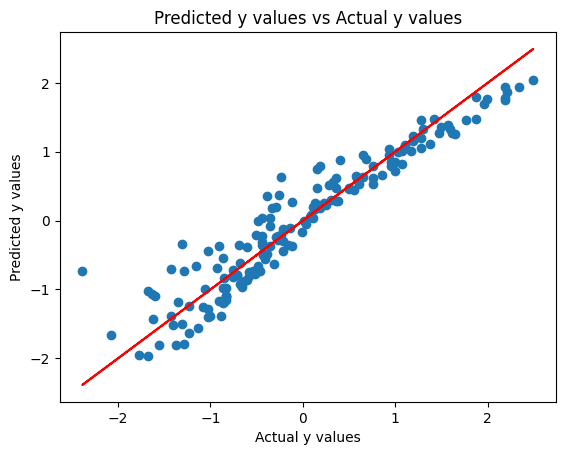

In [32]:
# Scatter plot of the actual y values against the predicted y values
plt.scatter(y_train, predict(X_train, optimal_weights))
plt.title('Predicted y values vs Actual y values')
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.plot(y_train, y_train, color='red')
plt.show()

Trend remarks: xxx

In [33]:
# r2 score of the training set
print(f"r2 score: {r2_score(y_train, predict(X_train, optimal_weights))}")

r2 score: 0.902786695352385


Interpretation of r2 score: The r^2 score 0.8953 means that 89.53% of the variance in the response variable is explained by the model. This means that our model is 90% accurate in predicting the sales.

### QUESTION 3
What happend to the error, r2, and cost as the number of iterations increases?

In [34]:
# Let's calculate the MSE for each iterations using sklearn
MSE_array = []
for i in range(iterations):
    MSE = mean_squared_error(y_train, predict(X_train, weights_history[i]))
    MSE_array.append(MSE)

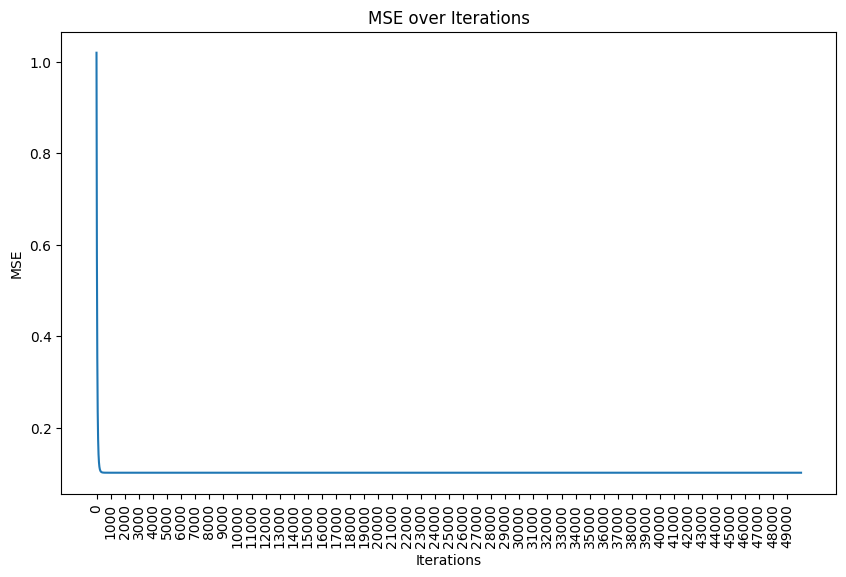

In [35]:
# Plot the MSE over iterations
plt.figure(figsize=(10, 6))
plt.plot(MSE_array)
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, iterations, 1000), rotation=90)
plt.ylabel('MSE')
plt.show()

As we can observed on the figure above, as the number of iterations the mean square error decreases.
Also we can see it plateauing even before reaching 1000 iterations. This means that at that at a particular point, the model is already accurate enough to predict the sales.

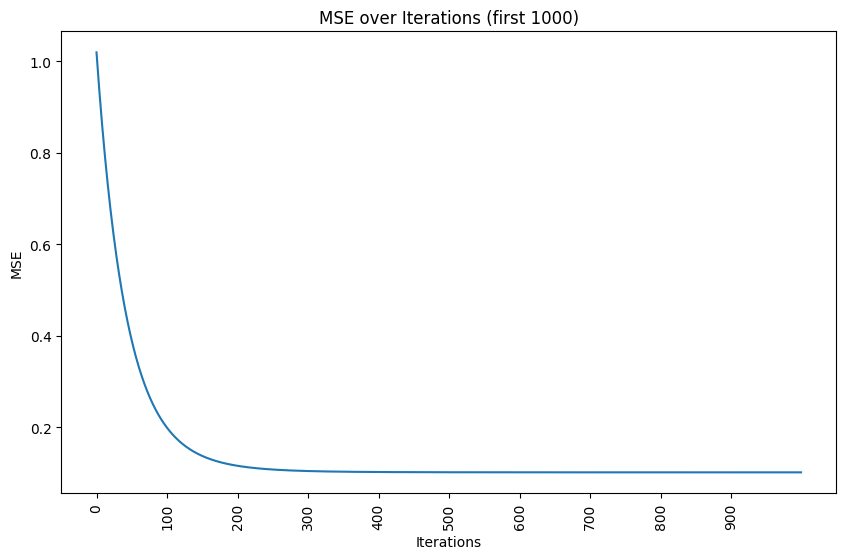

In [36]:
# Let's try to zoom in the plot
plt.figure(figsize=(10, 6))
plt.plot(MSE_array[0:1000])
plt.title('MSE over Iterations (first 1000)')
plt.xlabel('Iterations')
plt.xticks(np.arange(0, 1000, 100), rotation=90)
plt.ylabel('MSE')
plt.show()

Now it becomes clear that around 400 iterations is enough to predict the sales. In the particular dataset we have.

Note that 400 iterations may not be the actual optimal number of iterations, we can calculate this later using the r^2 score. The number is based purely on the observation on the given plot above.

In [37]:
# Let's calculate for the r^2 score for each iterations
r2_array = []
for i in range(iterations):
    r2 = r2_score(y_train, predict(X_train, weights_history[i]))
    r2_array.append(r2)

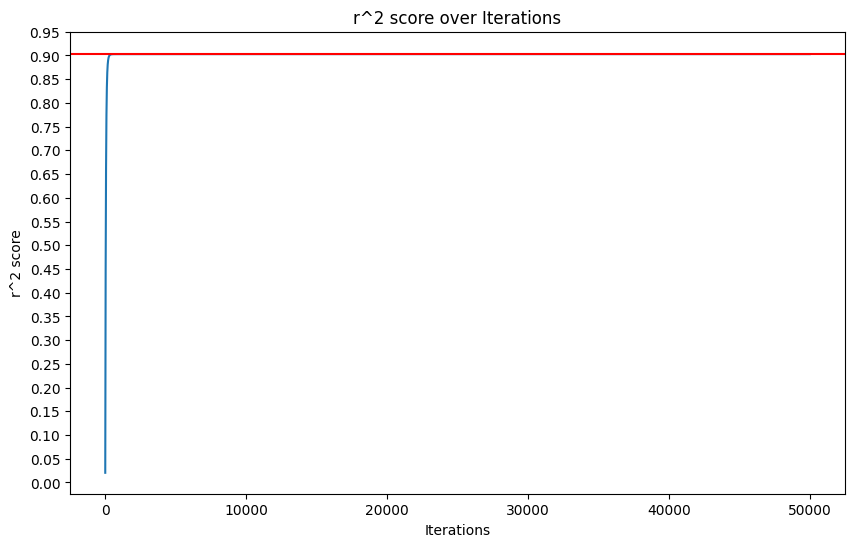

Maximum r^2 score: 0.902786695352385


In [38]:
# Plot the r^2 score over iterations
plt.figure(figsize=(10, 6))
plt.plot(r2_array)
plt.title('r^2 score over Iterations')
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.yticks(np.arange(0, 1, 0.05))
# We can also mark the maximum r^2 score
plt.axhline(y=max(r2_array), color='r', linestyle='-')
plt.show()


# Print the maximum r^2 score
print(f"Maximum r^2 score: {max(r2_array)}")

Wow! The figure from the above cell shows an intersting pattern, as it is the exact reverse of the MSE figure. This means that as the error decreases, the r^2 score increases.
Which means that the model is more accurate as the error decreases.

We can also see that it is only accurate enough to a certain percentage, which is the maximum r^2 score of 0.9039 or 90.39% accurate.

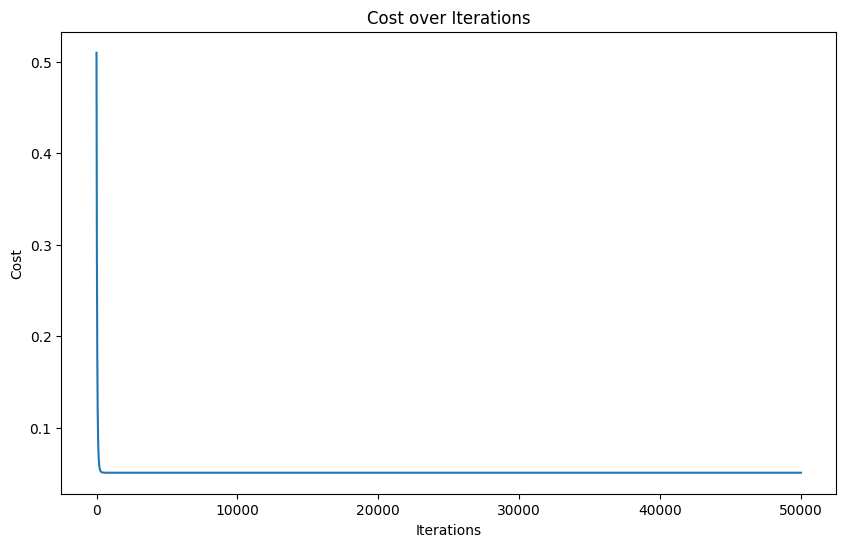

In [39]:
# Finally, let's plot the cost over iterations
plot_costs(cost_history)

Well the figure for cost over iterations is the same as with out MSE over iterations plot. Hence we can say that as our error decreases, our cost decreases as well.

Which means that as we get more accurate (as we saw in r^2 over iterations plot), our cost decreases.

In [40]:
# Before we proceed to the next question, let us identify the optimal number of iterations in this dataset.

# Let's create a function to find the optimal number of iterations
# This function will simply return the number of iterations that gives the maximum r^2 score
def optimal_iterations(max_r2, r2_array):
    for i in range(len(r2_array)):
        if r2_array[i] == max_r2:
            return i

In [41]:
optimal_iterations = optimal_iterations(max(r2_array), r2_array)
print(f"Optimal number of iterations: {optimal_iterations}")

Optimal number of iterations: 3181


In [42]:
# Let's check the cost at the optimal number of iterations
print(f"Cost at the optimal number of iterations: {cost_history[optimal_iterations]}")
# Also the weights at the optimal number of iterations
print(f"Weights at the optimal number of iterations: {weights_history[optimal_iterations]}")

# Let's compare it at the last iteration
print(f"\n\nCost at the last iteration: {cost_history[-1]}")
print(f"Weights at the last iteration: {weights_history[-1]}")

Cost at the optimal number of iterations: 0.05057875537778292
Weights at the optimal number of iterations: [0.00839899 0.76376547 0.50724347 0.00187478]


Cost at the last iteration: 0.05057875537778292
Weights at the last iteration: [0.00839899 0.76376547 0.50724348 0.00187478]


As we can see there's no actual significant difference between the r^2 score and cost at the optimal number of iterations (2644) and the number of iterations that we have chosen (50,000).

Which means we have wasted a lot of time and resources indoing the gradient descent for 50,000 iterations. As there no more greater improvement that is happening to the accuracy of the model at a certain point within the 50,000 iterations.

We can improve this by redefining our gradient descent function to stop when the cost score reaches a certain difference threshold.
The difference threshold can be set to the difference between the cost score of the current iteration and the cost score of the previous iteration.
If the difference is less than the threshold, then we can stop the gradient descent.

For example the difference between the cost score of the current iteration and the cost score of the previous iteration is less than 0.0001, then we can stop the gradient descent.

In [43]:
# Implementation of Gradient Descent Algorithm with Difference Threshold
def gradient_descent_optimized(X, y, weights, alpha, iterations, diff_threshold):
    # Since we are to produce 2 matrices, we first initialize these two matrices
    weights_history = []
    cost_history = []
    last_iteration = 0

    # Loop through the number of iterations
    for i in range(iterations):
        # Update the weights
        weights = update_weights(X, y, weights, alpha)
        # Save the weights in the weights history matrix
        weights_history.append(weights)
        # Compute the cost
        cost = compute_cost(X, y, weights)
        # Save the cost in the cost history matrix
        cost_history.append(cost)

        # Check if the difference between the current cost and the previous cost is less than the threshold
        if i > 0 and abs(cost_history[i] - cost_history[i-1]) < diff_threshold:
            last_iteration = i
            # If yes, then we will break out of the loop
            break
        last_iteration = i
        
    return weights_history, cost_history, last_iteration

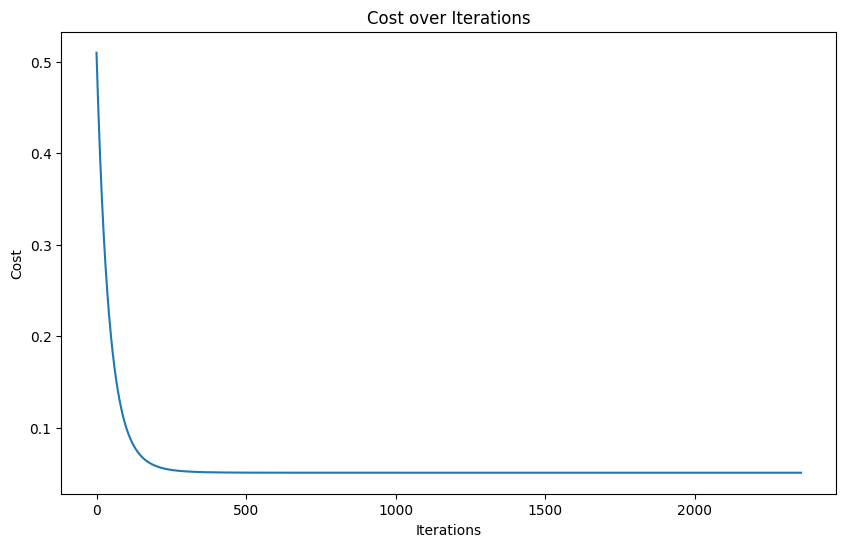

In [44]:
# Let's try the optimized gradient descent algorithm we made

# Set the target iterations and the learning rate
iterations = 50000
alpha = 0.01

# Set the difference threshold
diff_threshold = 1.0e-15

# Run the optimized gradient descent algorithm
weights_history, cost_history, optimal_iterations = gradient_descent_optimized(X_train, y_train, init_w, alpha, iterations, diff_threshold)

# plot the cost over iterations
plot_costs(cost_history)

### QUESTION 4 and 5

Once you determine the optimal number of iterations, check the effect on the cost and error as you change the learning rate.

Is there a relationship on the learning rate and the number of iterations?

In [45]:
init_w = initialize_weights(X_train)

# For this will use the optimal iterations based on the previous question.
iterations = optimal_iterations

# Let us define a list of learning rate that we will be using for us to answer the fourth question effectively.
learning_rates = [0.6, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Store the values of the cost and error in the following dictionary
cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_history_dict = {i:[] for i in learning_rates}

# Loop through the learning rates
for alpha in learning_rates:
    # Run the gradient descent algorithm
    weights_history, cost_history = gradient_descent(X_train, y_train, init_w, alpha, iterations)

    # UPDATE THE DICTIONARIES
    # Get the final weights (Optimal weights)
    cost_dict[alpha] = cost_history[-1]
    # Calculate for the MSE
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, weights_history[-1]))
    # Save the cost history
    cost_history_dict[alpha] = cost_history

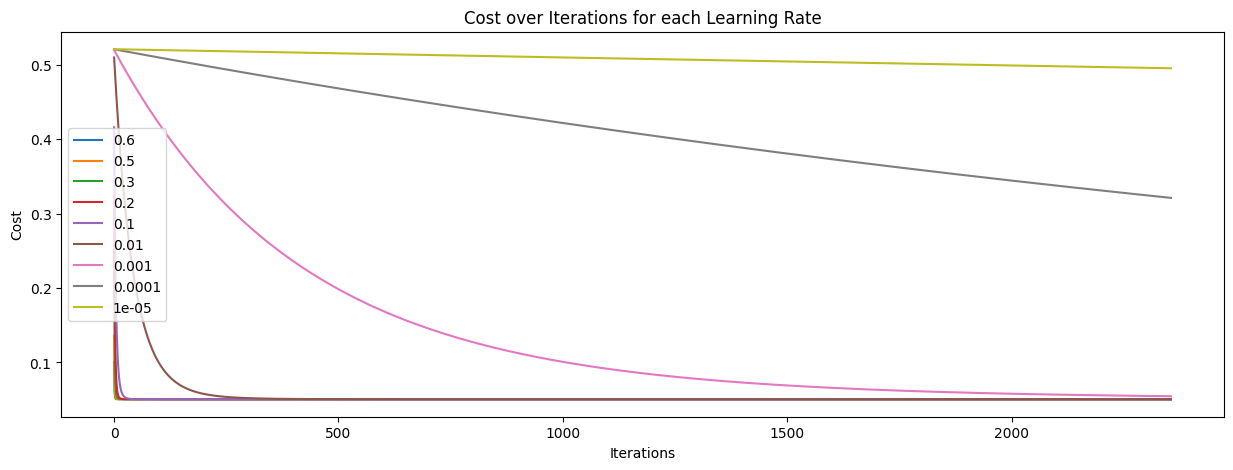

In [46]:
# Plot the cost over iterations for each learning rate (in the same plot)
plt.figure(figsize=(15, 5))
for alpha in learning_rates:
    plt.plot(cost_history_dict[alpha], label=alpha)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [47]:
# I think we can use a dataframe to make it easier to read
df_learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSE': list(error_dict.values())})
df_learning_rates

,Learning Rate,Cost,MSE
0,0.60000,0.050579,0.101158
1,0.50000,0.050579,0.101158
2,0.30000,0.050579,0.101158
3,0.20000,0.050579,0.101158
4,0.10000,0.050579,0.101158
5,0.01000,0.050579,0.101158
6,0.00100,0.054599,0.109198
7,0.00010,0.321063,0.642125
8,0.00001,0.495163,0.990326


For us to better see the relationship between the learning rate and the number of iterations, use the optimized GDA we have created previously and determine the optimal number of iterations for each learning rate.

In [48]:
init_w = initialize_weights(X_train)

# Let's try it with 500K iterations
iterations = 500_000

# Let us define a list of learning rate that we will be using for us to answer the fifth question effectively.
learning_rates = [0.6, 0.5, 0.3, 0.2, 0.1, 0.01, 0.001, 0.0001, 0.00001]

# Store the values of the cost and error in the following dictionary
cost_dict = {i:0 for i in learning_rates}
error_dict = {i:0 for i in learning_rates}
cost_history_dict = {i:[] for i in learning_rates}
optimal_iterations_dict = {i:0 for i in learning_rates}

# Set the difference threshold
diff_threshold = 1.0e-15

# Loop through the learning rates
# Use CUDA to speed up the process (Since I am using an NVIDIA GPU, I can utilize the CUDA cores :) )
for alpha in learning_rates:
    # Run the gradient descent algorithm
    weights_history, cost_history, optimal_iterations = gradient_descent_optimized(X_train, y_train, init_w, alpha, iterations, diff_threshold)

    # UPDATE THE DICTIONARIES
    # Get the final weights (Optimal weights)
    cost_dict[alpha] = cost_history[-1]
    # Calculate for the MSE
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, weights_history[-1]))
    # Save the cost history
    cost_history_dict[alpha] = cost_history
    # Save the optimal iterations
    optimal_iterations_dict[alpha] = optimal_iterations

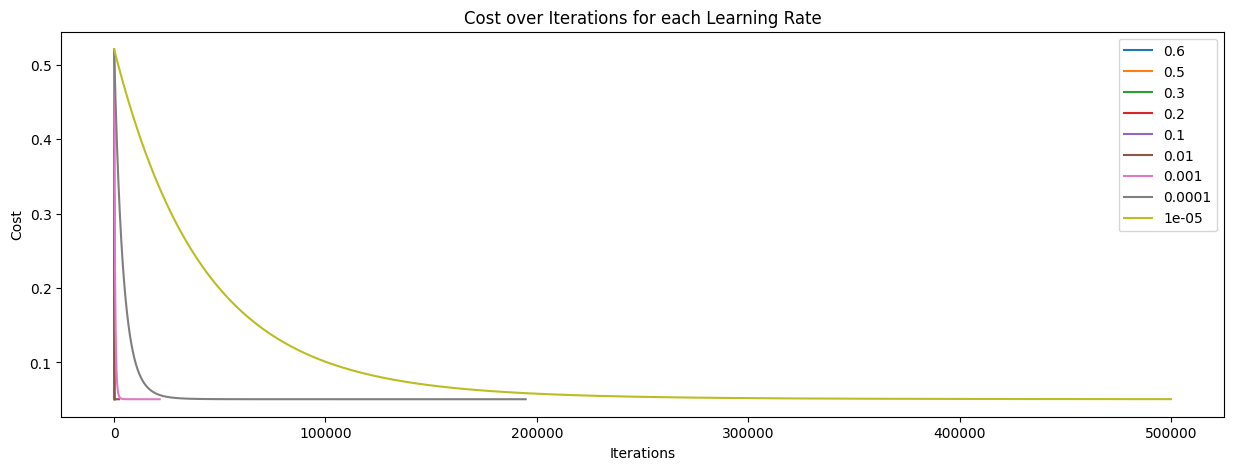

In [49]:
# Plot the cost over iterations for each learning rate (in the same plot)
plt.figure(figsize=(15, 5))
for alpha in learning_rates:
    plt.plot(cost_history_dict[alpha], label=alpha)
plt.title('Cost over Iterations for each Learning Rate')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [50]:
df_learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'MSE': list(error_dict.values()), 'Optimal Iterations': list(optimal_iterations_dict.values())})
df_learning_rates

,Learning Rate,Cost,MSE,Optimal Iterations
0,0.60000,0.050579,0.101158,38
1,0.50000,0.050579,0.101158,47
2,0.30000,0.050579,0.101158,81
3,0.20000,0.050579,0.101158,124
4,0.10000,0.050579,0.101158,250
5,0.01000,0.050579,0.101158,2356
6,0.00100,0.050579,0.101158,21541
7,0.00010,0.050579,0.101158,194735
8,0.00001,0.050685,0.101369,499999


Relationship between the learning rate and the number of iterations:
As the learning rate increases, the number of iterations needed to reach optimal iteration (based on a certain threshold) decreases. And vice versa.

### QUESTION 6
Compare the results with the results of the sklearn implementation (Ordinary Least Squares).

In [51]:
# Use Oridinary Least Squares from sklearn
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(X_train, y_train).coef_

# Get the r^2 score for the OLS and the gradient descent
r2_OLS = r2_score(y_train, ols.predict(X_train))
r2_GDA = r2_array[-1]

print(f"r^2 score (OLS): {r2_OLS}")
print(f"r^2 score (GDA): {r2_GDA}")

r^2 score (OLS): 0.9027866953523849
r^2 score (GDA): 0.902786695352385
